In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read CSV
df = pd.read_csv("housing.csv")

In [3]:
# Printed headers
print(df.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [4]:
# Input X, Output Y
X = df.drop(columns=["median_house_value"])
Y = df["median_house_value"]

In [5]:
# Handled missig data by filling in with X,means
X = X.fillna(X.mean(

In [6]:
# Ocean_proximity is only category not in a numeric state. Convert the column.
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)

In [7]:
# split our data into train split. use 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [8]:
# Standardizing train and test data with StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create
linear_model = LinearRegression()
# Train
linear_model.fit(X_train, Y_train)

# Predict model
Y_pred_linear = linear_model.predict(X_test)

# Calc the RSME for our linear regression
rsme_linear = mean_squared_error(Y_test, Y_pred_linear, squared=False)
print("Root Mean Squared Error (Linear Regression):", rsme_linear)

Root Mean Squared Error (Linear Regression): 70031.41991955663


In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, Y_train)

Y_pred_dt = dt_model.predict(X_test)

rsme_dt = mean_squared_error(Y_test, Y_pred_dt, squared=False)
print("Root Mean Squared Error (Decision Tree Regression):", rsme_dt)

Root Mean Squared Error (Decision Tree Regression): 68680.49283154613


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train, Y_train)

Y_pred_rf = dt_model.predict(X_test)

rsme_rf = mean_squared_error(Y_test, Y_pred_rf, squared=False)
print("Root Mean Squared Error (Random Forest Regression):", rsme_rf)

Root Mean Squared Error (Random Forest Regression): 68680.49283154613


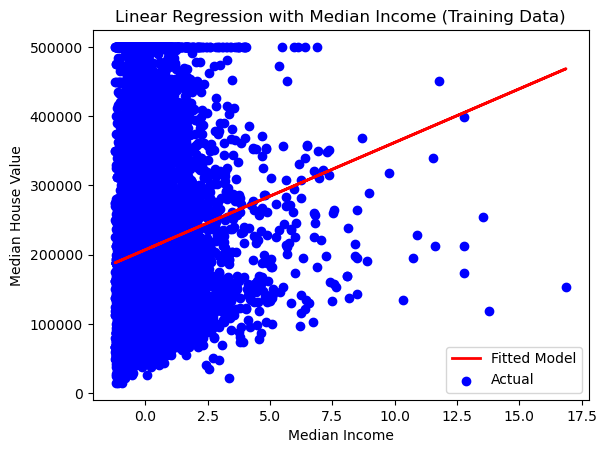

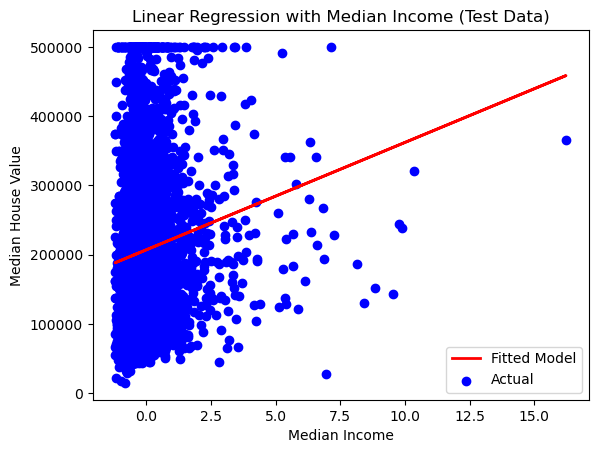

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract just the "median_income" column from the independent variables
X_train_income = X_train[:, 3].reshape(-1, 1)
X_test_income = X_test[:, 3].reshape(-1, 1)

# Create and train the Linear Regression model with median_income as the only feature
linear_model_income = LinearRegression()
linear_model_income.fit(X_train_income, Y_train)  # Fit the model with training data

# Make predictions using the trained model on training data
Y_pred_train_income = linear_model_income.predict(X_train_income)

# Make predictions using the trained model on test data
Y_pred_test_income = linear_model_income.predict(X_test_income)

# Plot the fitted model for training data
plt.scatter(X_train_income, Y_train, color="blue", label="Actual")
plt.plot(X_train_income, Y_pred_train_income, color="red", linewidth=2, label="Fitted Model")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression with Median Income (Training Data)")
plt.legend()
plt.show()

# Plot the fitted model for test data
plt.scatter(X_test_income, Y_test, color="blue", label="Actual")
plt.plot(X_test_income, Y_pred_test_income, color="red", linewidth=2, label="Fitted Model")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression with Median Income (Test Data)")
plt.legend()
plt.show()

In [13]:
# Looks very skewed, lets try a lesso and ridge

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create Lasso Reg Model
lasso_model = Lasso(alpha=1.0)

#Training
lasso_model.fit(X_train, Y_train)

# Make prediction 

Y_pred_lasso = lasso_model.predict(X_test)

#Calc the RSM
rsme_lasso = mean_squared_error(Y_test, Y_pred_lasso, squared=False)
print("Root Mean Squared Error (Lasso Regression):", Y_pred_lasso)

Root Mean Squared Error (Lasso Regression): [ 64625.61260356 134786.32552345 266071.12788776 ... 439173.07809188
 120800.23247391 183387.99268723]


In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create Lasso Reg Model
ridge_model = Ridge(alpha=1.0)

#Training
ridge_model.fit(X_train, Y_train)

# Make prediction 

Y_pred_ridge = ridge_model.predict(X_test)

#Calc the RSM
rsme_ridge = mean_squared_error(Y_test, Y_pred_ridge, squared=False)
print("Root Mean Squared Error (Ridge Regression):", Y_pred_ridge)

Root Mean Squared Error (Ridge Regression): [ 64608.79136025 134749.65503985 266129.85395289 ... 439156.27015319
 120811.17897083 183394.31550336]


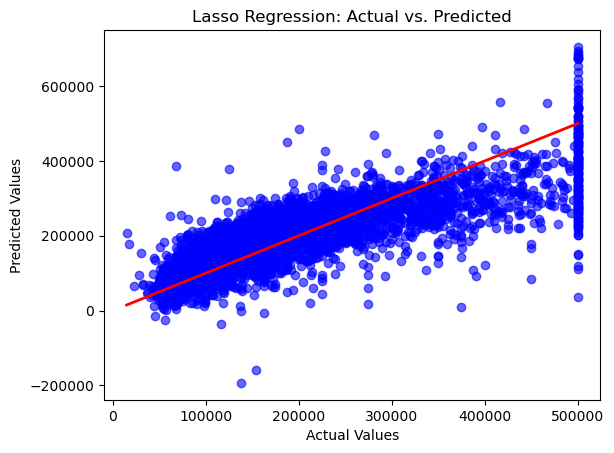

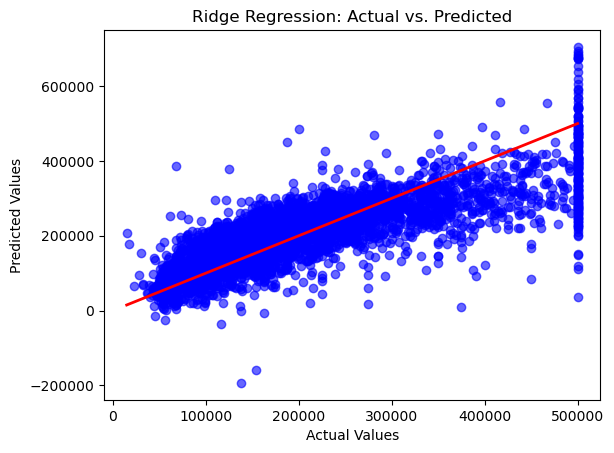

In [20]:
plt.scatter(Y_test, Y_pred_lasso, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs. Predicted")
plt.show()

# Scatter plot for Ridge Regression
plt.scatter(Y_test, Y_pred_ridge, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs. Predicted")
plt.show()
